# RFM 

In [342]:
#import useful libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from datetime import datetime

#ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [343]:
#import data and display dimensions
df = pd.read_csv('data.csv',encoding='unicode_escape')
df.shape

(541909, 8)

In [344]:
#sample data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [345]:
#check null values
(df.isna().sum()/df.shape[0])*100 

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

-> Around 25% of customer data are missing, delete all missing customer data as we can not work without CustomerId

In [347]:
df.dropna(subset=['CustomerID'], inplace=True)
(df.isna().sum()/df.shape[0])*100 

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [348]:
#check duplicated data
print(f'Data has {df[df.duplicated()].shape[0]} duplicate data.')

Data has 5225 duplicate data.


In [349]:
#remove duplicate data
df.drop_duplicates(inplace=True)
print(f'Data has {df[df.duplicated()].shape[0]} duplicate data after removing duplicates.')

Data has 0 duplicate data after removing duplicates.


In [350]:
#create price column for monetary
df['Price'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [351]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
 8   Price        401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.6+ MB


In [352]:
#convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Price        401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [353]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [354]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,401604.0,12.183273,-80995.0,2.0,5.0,12.0,80995.0,250.283037
InvoiceDate,401604,2011-07-10 12:08:23.848567552,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:30,2011-12-09 12:50:00,NaN
UnitPrice,401604.0,3.474064,0.0,1.25,1.95,3.75,38970.0,69.764035
CustomerID,401604.0,15281.160818,12346.0,13939.0,15145.0,16784.0,18287.0,1714.006089
Price,401604.0,20.613638,-168469.6,4.25,11.7,19.8,168469.6,430.352218


In [355]:
new_date = datetime(2011,12,10)
new_date

datetime.datetime(2011, 12, 10, 0, 0)

## Customer Segmentation using RFM Analysis
#### RFM Analysis : A marketing technique to understand customer behaviour
#### R: Recency   : How recently a customer brought
#### F: Frequency : How many time a customer have brought
#### M: Monetary  : How much a money a customer has spentr

In [357]:
df_rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (new_date-x.max()).days,
                                      'InvoiceNo': lambda x: x.count(),
                                      'Price': lambda x: x.sum()})
df_rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Price':'Monetary'}, inplace=True)
df_rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,13,176.60


In [358]:
df_rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4372.0,91.581199,100.772139,0.00,16.000,50.00,143.000,373.00
Frequency,4372.0,91.858188,229.223566,1.00,17.000,41.00,99.250,7812.00
Monetary,4372.0,1893.531433,8218.696204,-4287.63,291.795,644.07,1608.335,279489.02


In [359]:
#split data into 4 quantile
quantile = df_rfm.quantile([.25,.5,.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}

In [360]:
def recency_check(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def frequency_monetary_check(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

x: The Recency,Frequency,Monetary value for a single customer.

p: The column name, here 'Recency','Frequency','Monetary'.

d: A dictionary of quantiles for Recency,Frequency,Monetary values.

In [362]:
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [363]:
df_rfm['R'] = df_rfm['Recency'].apply(recency_check, args=('Recency',quantile))
df_rfm['F'] = df_rfm['Frequency'].apply(frequency_monetary_check, args=('Frequency',quantile))
df_rfm['M'] = df_rfm['Monetary'].apply(frequency_monetary_check, args=('Monetary',quantile))
df_rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,2,0.00,4,4,4
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [364]:
df_rfm['RFM'] = df_rfm[['R','F','M']].sum(axis=1)
df_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
12346.0,325,2,0.00,4,4,4,12
12347.0,2,182,4310.00,1,1,1,3
12348.0,75,31,1797.24,3,3,1,7
12349.0,18,73,1757.55,2,2,1,5
12350.0,310,17,334.40,4,4,3,11


In [365]:
df_rfm[df_rfm['RFM']==3]

,Recency,Frequency,Monetary,R,F,M,RFM
CustomerID,,,,,,,
12347.0,2,182,4310.00,1,1,1,3
12359.0,7,251,6182.98,1,1,1,3
12362.0,3,274,5154.58,1,1,1,3
12388.0,15,100,2780.66,1,1,1,3
12395.0,15,159,2998.28,1,1,1,3
...,...,...,...,...,...,...,...
18229.0,11,164,7276.90,1,1,1,3
18241.0,9,105,2058.09,1,1,1,3
18245.0,7,177,2507.56,1,1,1,3


In [366]:
df_rfm['RFM'].value_counts()

RFM
10    518
9     467
7     466
3     457
5     439
8     439
6     420
12    392
11    389
4     385
Name: count, dtype: int64

### Split customer into 5 groups Platinum, Diamond, Gold, Silver, Bronze 

In [368]:
score_cut = pd.qcut(df_rfm['RFM'], q=5, labels=["Platinum", "Diamond", "Gold", "Silver", "Bronze"])
df_rfm['Loyalty'] = score_cut
df_rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty
CustomerID,,,,,,,,
12346.0,325,2,0.00,4,4,4,12,Bronze
12347.0,2,182,4310.00,1,1,1,3,Platinum
12348.0,75,31,1797.24,3,3,1,7,Diamond
12349.0,18,73,1757.55,2,2,1,5,Platinum
12350.0,310,17,334.40,4,4,3,11,Bronze


In [369]:
df_rfm['Loyalty'].value_counts()

Loyalty
Platinum    1281
Gold         906
Diamond      886
Bronze       781
Silver       518
Name: count, dtype: int64

In [370]:
df_rfm.reset_index().to_csv('RFM.csv')

In [371]:
df_rfm = df_rfm.reset_index()
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyalty
0,12346.0,325,2,0.00,4,4,4,12,Bronze
1,12347.0,2,182,4310.00,1,1,1,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,7,Diamond
3,12349.0,18,73,1757.55,2,2,1,5,Platinum
4,12350.0,310,17,334.40,4,4,3,11,Bronze


In [372]:
customers = df_rfm.groupby('Loyalty').agg({'CustomerID':'count'}).reset_index()
customers.rename(columns={'CustomerID':'Customers'}, inplace=True)
customers

,Loyalty,Customers
0,Platinum,1281
1,Diamond,886
2,Gold,906
3,Silver,518
4,Bronze,781


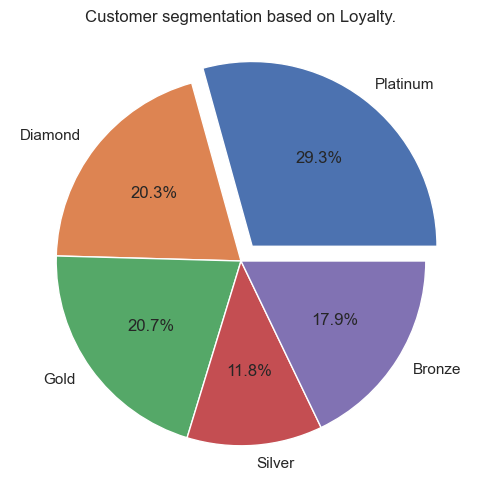

In [373]:
#pie chart of loyalty
plt.figure(figsize=(6,6))
plt.pie(customers['Customers'],labels=customers['Loyalty'], autopct="%0.1f%%", explode=[0.1,0,0,0,0])
plt.title('Customer segmentation based on Loyalty.')
plt.show()